**Описание датасета**
Данные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [1]:
# import of required libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
# Функция заполнения пропущенных значений
# Функция принимает на вход датафрейм df и необязательный перечень колонок в которых будут производится замены.
# Если список колонок не передавать, замена будет производиться по всем колонкам датафрейма.
# и необязательный параметр func - функция с помощью которой будет производится замена:
# По умолчанию auto - для числовых применяется median(), для не числовых - mode()
# median - независимо от типа данных применяется median()
# mode - независимо от типа данных применяется mode()
# Функция возвращает датафрейм с заполнеными пропусками.
# Пример вызова: df = fill_nan(df, 'column1', 'column2') или df = fill_nan(df)

def fill_nan(df, *args, func='auto'):
    if len(args) == 0:
        colum = df.columns
    else:
        colum = args
    for col in colum:
        if (np.dtype(df[col]) == float) or (np.dtype(df[col]) == int):
            if (func == 'auto') | (func == 'median'):
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
        elif np.dtype(df[col]) == object:
            if (func == 'auto') | (func == 'mode'):
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].median())
    return df


# Функция построения boxplot-ов
# Функция принимает на вход датафрейм df и необязательный перечень колонок по которым будут строится boxplot-ы.
# Если список колонок не передавать, построение будет производиться по всем колонкам датафрейма.
# # Функция ничего не
def get_boxplot(df, *args):
    for col in df.columns:
        if (len(args) == 0) or (col in arg):
            fig, ax = plt.subplots(figsize = (14, 4))
            sns.boxplot(x=col, y='score',
                        data=df, ax=ax)
            plt.xticks(rotation=45)
            ax.set_title('Boxplot for ' + col)
            plt.show()


# Функция выполняет тест Стьюдента для колонки column из датафрейма df
# Функция принимает на вход датафрейм df и имя колонки.
# Функция ничего не возвращает.
# Результат работы - нахождение статистических различий для колонки column, выводится на экран
def get_stat_dif(df, column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
        #else:
        #    print ('Нет статистически значимых различий для колонки', column)

In [3]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 40) # показывать больше колонок

In [4]:
students = pd.read_csv(r'stud_math.xls')
display(students)
display(students.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

Переименуем столбец 'studytime, granular'

In [5]:
students.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

<AxesSubplot:>

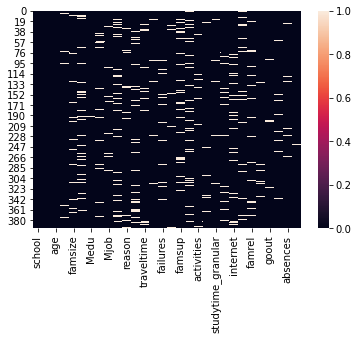

In [6]:
sns.heatmap(students.isnull())

Датасетсет содержит 395 строк данных  
30 колонок показателей, 
из них 13 - числовых и 17 - строковых, но по сути только ___age, failures, absences___ - являются количественными,  
остальные -  признаки.  
Кроме ___school, sex, age___ все столбцы имеют пропуски данных  
Столбец ___score___ является целевым

Теперь рассмотрим все столбцы по отдельности  

Начнем с числовых показателей

# age

Этот столбец числовой и без пропусков. Посмотрим на его распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

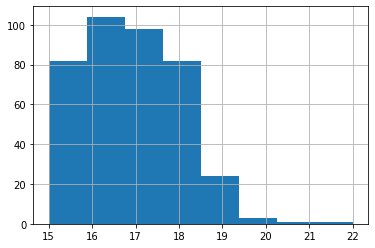

In [7]:
students.age.hist(bins=len(students.age.unique()))
students.age.describe()

из распределения видно, что оно смещено вправо и молодых в возрасте 20 - 22 года очень мало, но так как задача стоит отследить влияние условий жизни учащихся в возрасте от 15 до 22, то эти значения не являются выбросом

# failures

Столбец содержит пропуски, заменим их медианой

In [8]:
#display(students.failures.unique())

In [9]:
students = fill_nan(students, 'failures')
#students.failures = students.failures.apply(lambda x: students.failures.median() if np.isnan(x) else x)
display(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            395 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

None

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

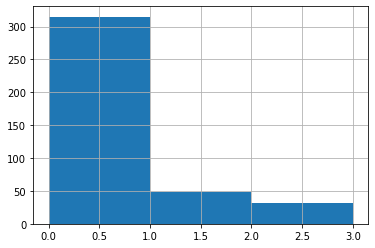

In [10]:
students.failures.hist(bins=3)
students.failures.describe()

Несмотря на то, что явно видны выбросы, удалять их не будем так как это полезные данные

# absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

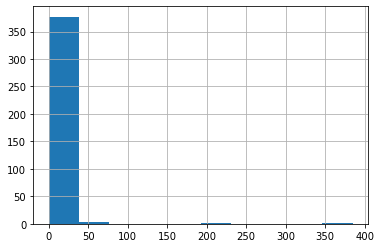

In [11]:
students.absences.hist()
students.absences.describe()

Этот столбец содержит 12 пропущенных значений, в данной категории пустые значения заменим медианой.  
Из распределения видны несколько значений >150, что явно противоречит логике - количество пропущенных занятий превышает количество самих занятий (150 - разумно предположимое количество занятий - 40 недель по 3-4 занятия в неделю (маткласс)), поэтому их удалим

In [12]:
students = fill_nan(students, 'absences')
students = students.loc[students.absences <= 150]
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              393 non-null    object 
 1   sex                 393 non-null    object 
 2   age                 393 non-null    int64  
 3   address             376 non-null    object 
 4   famsize             366 non-null    object 
 5   Pstatus             348 non-null    object 
 6   Medu                390 non-null    float64
 7   Fedu                369 non-null    float64
 8   Mjob                374 non-null    object 
 9   Fjob                357 non-null    object 
 10  reason              376 non-null    object 
 11  guardian            363 non-null    object 
 12  traveltime          365 non-null    float64
 13  studytime           386 non-null    float64
 14  failures            393 non-null    float64
 15  schoolsup           384 non-null    object 
 16  famsup  

None

count    393.000000
mean       5.697201
std        7.969484
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

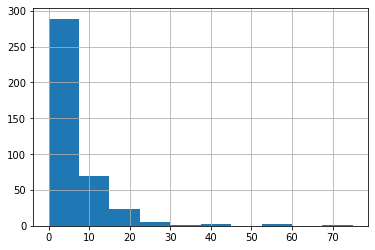

In [13]:
students.absences.hist()
students.absences.describe()

В данных есть выбросы, но удалять их не будем, так как такое вполне вероятно (длительная болезнь) и такие данные потенциально полезные

# score
Столбец содержит пропуски, но так как это целевые данные заменять их не будем, просто удалим не информативные строки, их немного - 6

In [14]:
students = students.loc[~ np.isnan(students.score)]
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              387 non-null    object 
 1   sex                 387 non-null    object 
 2   age                 387 non-null    int64  
 3   address             372 non-null    object 
 4   famsize             360 non-null    object 
 5   Pstatus             342 non-null    object 
 6   Medu                384 non-null    float64
 7   Fedu                363 non-null    float64
 8   Mjob                368 non-null    object 
 9   Fjob                351 non-null    object 
 10  reason              370 non-null    object 
 11  guardian            357 non-null    object 
 12  traveltime          359 non-null    float64
 13  studytime           380 non-null    float64
 14  failures            387 non-null    float64
 15  schoolsup           378 non-null    object 
 16  famsup  

None

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

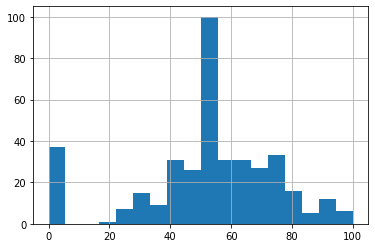

In [15]:
students.score.hist(bins=len(students.score.unique()))
students.score.describe()

Как видно данные выбросов не содержат и расположены в интервале от 0 до 100, что логично.

# Medu

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

<AxesSubplot:>

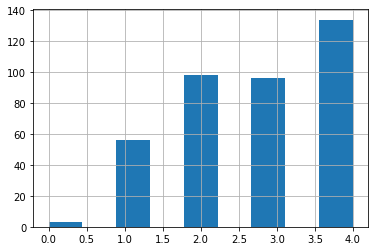

In [16]:
students = fill_nan(students, 'Medu', func='mode')
#display(students.info())
students.Medu.hist(bins=int(1+3.322*math.log10(len(students.Medu))))

Распределение без выбросов и соответствует ожидаемому

# Fedu

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

2.0     128
3.0      93
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

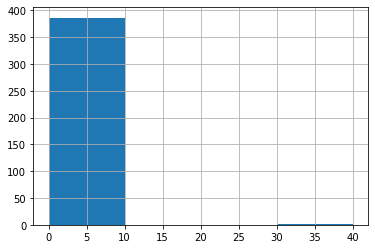

In [17]:
students = fill_nan(students, 'Fedu', func='mode')
#display(students.info())
students.Fedu.hist(bins=4)
display(students.Fedu.value_counts())

Имеется ошибочное значение (по условиям значения лежат в диапазоне 1-4), оно одно поэтому его удалим

<AxesSubplot:>

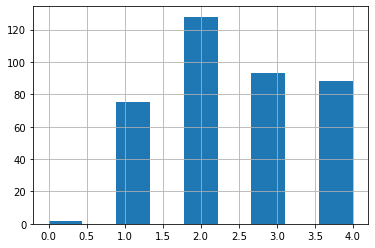

In [18]:
students = students.loc[students.Fedu <= 4]
#display(students.info())
students.Fedu.hist(bins=int(1+3.322*math.log10(len(students.Fedu))))
#display(students.Fedu.value_counts())

Распределение без выбросов и соответствует ожидаемому

# traveltime

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

1.0    265
2.0     94
3.0     20
4.0      7
Name: traveltime, dtype: int64

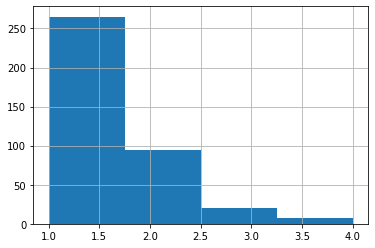

In [19]:
students = fill_nan(students, 'traveltime', func='mode')
#display(students.info())
students.traveltime.hist(bins=4)
display(students.traveltime.value_counts())

Распределение без выбросов и соответствует ожидаемому

# studytime

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

In [20]:
display(students.studytime.value_counts())

2.0    187
1.0    103
3.0     62
4.0     27
Name: studytime, dtype: int64

2.0    194
1.0    103
3.0     62
4.0     27
Name: studytime, dtype: int64

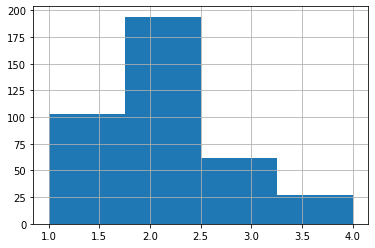

In [21]:
students = fill_nan(students, 'studytime', func='mode')
#display(students.info())
students.studytime.hist(bins=4)
display(students.studytime.value_counts())

Распределение без выбросов и соответствует ожидаемому

# studytime_granular

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

-6.0     194
-3.0     103
-9.0      62
-12.0     27
Name: studytime_granular, dtype: int64

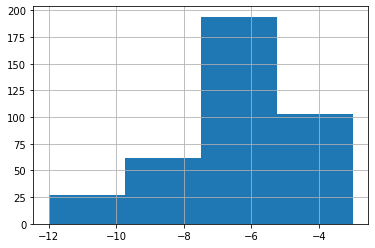

In [22]:
students = fill_nan(students, 'studytime_granular', func='mode')
#display(students.info())
students.studytime_granular.hist(bins=4)
display(students.studytime_granular.value_counts())

Распределение без выбросов

# famrel

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

 4.0    205
 5.0     95
 3.0     62
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

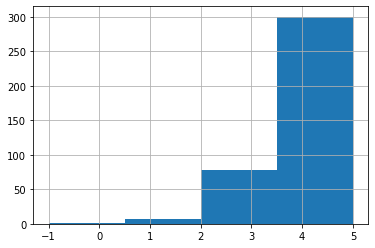

In [23]:
students = fill_nan(students, 'famrel', func='mode')
#display(students.info())
students.famrel.hist(bins=4)
display(students.famrel.value_counts())

Имеется одно ошибочное значение - "-1" (допустимый диапазон 1-5), его удалим

4.0    205
5.0     95
3.0     62
2.0     16
1.0      7
Name: famrel, dtype: int64

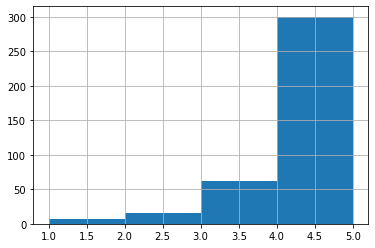

In [24]:
students = students.loc[students.famrel >= 0]
#display(students.info())
students.famrel.hist(bins=4)
display(students.famrel.value_counts())

Распределение без выбросов и соответствует ожидаемому

# freetime

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

3.0    160
4.0    110
2.0     61
5.0     36
1.0     18
Name: freetime, dtype: int64

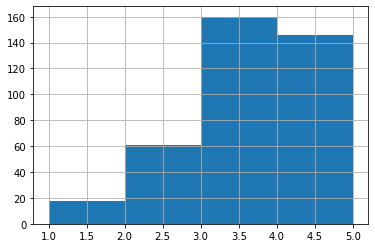

In [25]:
students = fill_nan(students, 'freetime', func='mode')
#display(students.info())
students.freetime.hist(bins=4)
display(students.freetime.value_counts())

Распределение без выбросов и соответствует ожидаемому

# goout

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

3.0    133
2.0     99
4.0     80
5.0     51
1.0     22
Name: goout, dtype: int64

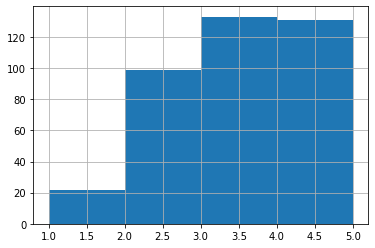

In [26]:
students = fill_nan(students, 'goout', func='mode')
#display(students.info())
students.goout.hist(bins=4)
display(students.goout.value_counts())

Распределение без выбросов и соответствует ожидаемому

# health

Несмотря на то, что столбец числовой эти данные носят категориальный характер, поэтому пропущенные данные восстановим наиболее часто встречающимися

5.0    151
3.0     87
4.0     58
1.0     47
2.0     42
Name: health, dtype: int64

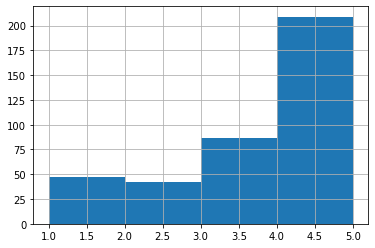

In [27]:
students = fill_nan(students, 'health', func='mode')
#display(students.info())
students.health.hist(bins=4)
display(students.health.value_counts())

Распределение без выбросов и соответствует ожидаемому

# school

Эти данные носят категориальный характер, пропусков нет

In [28]:
display(students.school.value_counts())

GP    341
MS     44
Name: school, dtype: int64

# sex

Эти данные носят категориальный характер, пропусков нет

In [29]:
display(students.sex.value_counts())

F    201
M    184
Name: sex, dtype: int64

# address

Эти данные носят категориальный характер

In [30]:
display(students.address.unique())

array(['U', nan, 'R'], dtype=object)

Пропущенные данные восстановим наиболее часто встречающимися

In [31]:
students = fill_nan(students, 'address')
display(students.address.value_counts())
display(students.info())

U    302
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             358 non-null    object 
 5   Pstatus             342 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                366 non-null    object 
 9   Fjob                349 non-null    object 
 10  reason              368 non-null    object 
 11  guardian            355 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           376 non-null    object 
 16  famsup  

None

# famsize

Эти данные носят категориальный характер

In [32]:
display(students.famsize.unique())

array([nan, 'GT3', 'LE3'], dtype=object)

Пропущенные данные восстановим наиболее часто встречающимися

In [33]:
students = fill_nan(students, 'famsize')
display(students.famsize.value_counts())
display(students.info())

GT3    279
LE3    106
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             342 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                366 non-null    object 
 9   Fjob                349 non-null    object 
 10  reason              368 non-null    object 
 11  guardian            355 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           376 non-null    object 
 16  famsup  

None

# Pstatus

Эти данные носят категориальный характер

In [34]:
display(students.Pstatus.unique())

array(['A', nan, 'T'], dtype=object)

Пропущенные данные восстановим наиболее часто встречающимися

In [35]:
students = fill_nan(students, 'Pstatus')
display(students.Pstatus.value_counts())
display(students.info())

T    350
A     35
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                366 non-null    object 
 9   Fjob                349 non-null    object 
 10  reason              368 non-null    object 
 11  guardian            355 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           376 non-null    object 
 16  famsup  

None

# Mjob, Fjob

Эти данные носят категориальный характер

In [36]:
display(students.Mjob.unique())
display(students.Fjob.unique())
display(students.Mjob.value_counts())
display(students.Fjob.value_counts())

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

other       127
services     94
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       193
services     97
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64

Пропущенные данные восстановить разумнее всего категорией 'other', к тому же она является наиболее часто встречающейся

In [37]:
students = fill_nan(students, 'Mjob', 'Fjob')
display(students.Mjob.value_counts())
display(students.Fjob.value_counts())
display(students.info())

other       146
services     94
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       229
services     97
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                385 non-null    object 
 9   Fjob                385 non-null    object 
 10  reason              368 non-null    object 
 11  guardian            355 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           376 non-null    object 
 16  famsup  

None

# reason

Эти данные носят категориальный характер

In [38]:
display(students.reason.unique())
display(students.reason.value_counts())

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

course        134
reputation    101
home          100
other          33
Name: reason, dtype: int64

Пропущенные данные восстановить разумнее всего категорией 'other', такая замена не должна повлиять на значимость колонки

In [39]:
students.reason = students.reason.fillna('other')
display(students.reason.unique())
display(students.reason.value_counts())

array(['course', 'other', 'home', 'reputation'], dtype=object)

course        134
reputation    101
home          100
other          50
Name: reason, dtype: int64

# guardian

Эти данные носят категориальный характер

In [40]:
display(students.guardian.unique())
display(students.guardian.value_counts())

array(['mother', 'father', 'other', nan], dtype=object)

mother    246
father     85
other      24
Name: guardian, dtype: int64

Пропущенные данные восстановим наиболее часто встречающимися

In [41]:
students = fill_nan(students, 'guardian')
display(students.guardian.value_counts())
display(students.info())

mother    276
father     85
other      24
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                385 non-null    object 
 9   Fjob                385 non-null    object 
 10  reason              385 non-null    object 
 11  guardian            385 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           376 non-null    object 
 16  famsup  

None

# schoolsup, famsup, paid, activities

Эти данные носят категориальный характер

In [42]:
display(students.schoolsup.unique())
display(students.famsup.unique())
display(students.paid.unique())
display(students.activities.unique())
display(students.schoolsup.value_counts())
display(students.famsup.value_counts())
display(students.paid.value_counts())
display(students.activities.value_counts())

array(['yes', 'no', nan], dtype=object)

array(['no', 'yes', nan], dtype=object)

array(['no', nan, 'yes'], dtype=object)

array(['no', 'yes', nan], dtype=object)

no     328
yes     48
Name: schoolsup, dtype: int64

yes    213
no     135
Name: famsup, dtype: int64

no     195
yes    151
Name: paid, dtype: int64

yes    191
no     180
Name: activities, dtype: int64

Пропущенные данные восстановим наиболее часто встречающимися

In [43]:
students = fill_nan(students, 'schoolsup', 'famsup', 'paid', 'activities')
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                385 non-null    object 
 9   Fjob                385 non-null    object 
 10  reason              385 non-null    object 
 11  guardian            385 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           385 non-null    object 
 16  famsup  

None

# nursery, higher, internet, romantic

Эти данные носят категориальный характер

In [44]:
display(students.nursery.unique())
display(students.higher.unique())
display(students.internet.unique())
display(students.romantic.unique())
display(students.nursery.value_counts())
display(students.higher.value_counts())
display(students.internet.value_counts())
display(students.romantic.value_counts())

array(['yes', 'no', nan], dtype=object)

array(['yes', nan, 'no'], dtype=object)

array([nan, 'yes', 'no'], dtype=object)

array(['no', nan, 'yes'], dtype=object)

yes    294
no      76
Name: nursery, dtype: int64

yes    346
no      19
Name: higher, dtype: int64

yes    297
no      54
Name: internet, dtype: int64

no     231
yes    123
Name: romantic, dtype: int64

Пропущенные данные восстановим наиболее часто встречающимися

In [45]:
students = fill_nan(students, 'nursery', 'higher', 'internet', 'romantic')
display(students.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                385 non-null    object 
 9   Fjob                385 non-null    object 
 10  reason              385 non-null    object 
 11  guardian            385 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           385 non-null    object 
 16  famsup  

None

Закончили восстановление данных
# Анализ взаимосвязей
Выясним, какие столбцы коррелируют с оценкой по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Выделим числовые данные в отдельный датафрейм, категориальные в отдельный

In [46]:
students_numerical = students.select_dtypes(include = [np.number])
students_categorical = students.select_dtypes(exclude = [np.number])
display(students_numerical.info())
display(students_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 385 non-null    int64  
 1   Medu                385 non-null    float64
 2   Fedu                385 non-null    float64
 3   traveltime          385 non-null    float64
 4   studytime           385 non-null    float64
 5   failures            385 non-null    float64
 6   studytime_granular  385 non-null    float64
 7   famrel              385 non-null    float64
 8   freetime            385 non-null    float64
 9   goout               385 non-null    float64
 10  health              385 non-null    float64
 11  absences            385 non-null    float64
 12  score               385 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 42.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      385 non-null    object
 1   sex         385 non-null    object
 2   address     385 non-null    object
 3   famsize     385 non-null    object
 4   Pstatus     385 non-null    object
 5   Mjob        385 non-null    object
 6   Fjob        385 non-null    object
 7   reason      385 non-null    object
 8   guardian    385 non-null    object
 9   schoolsup   385 non-null    object
 10  famsup      385 non-null    object
 11  paid        385 non-null    object
 12  activities  385 non-null    object
 13  nursery     385 non-null    object
 14  higher      385 non-null    object
 15  internet    385 non-null    object
 16  romantic    385 non-null    object
dtypes: object(17)
memory usage: 54.1+ KB


None

Перенесем псевдочисловые данные: ___Medu, Fedu, traveltime, studytime, famrel, goout, health, studytime_granular___ в students_categorical  
и продублируем колонку ___score___
Сначала скопируем их во временный датафрейм  
Затем запишем их в датафрейм students_categorical

In [47]:
temp_df = students_numerical[['Medu', 'Fedu', 'traveltime', 'studytime', 
                              'famrel', 'goout', 'health', 'studytime_granular', 'freetime', 'score']] # копирование
for colum in temp_df.columns:
    students_categorical.insert(1, colum, temp_df[colum]) # Запись
temp_df.drop(['score'], axis=1, inplace = True) # Удаление score из temp_df, чтобы не удалить из students_numerical
for colum in temp_df.columns:
    students_numerical.drop([colum], axis=1, inplace = True) # Удаление
display(students_numerical.info())
display(students_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       385 non-null    int64  
 1   failures  385 non-null    float64
 2   absences  385 non-null    float64
 3   score     385 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.0 KB


C:\Users\Cfif\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   score               385 non-null    float64
 2   freetime            385 non-null    float64
 3   studytime_granular  385 non-null    float64
 4   health              385 non-null    float64
 5   goout               385 non-null    float64
 6   famrel              385 non-null    float64
 7   studytime           385 non-null    float64
 8   traveltime          385 non-null    float64
 9   Fedu                385 non-null    float64
 10  Medu                385 non-null    float64
 11  sex                 385 non-null    object 
 12  address             385 non-null    object 
 13  famsize             385 non-null    object 
 14  Pstatus             385 non-null    object 
 15  Mjob                385 non-null    object 
 16  Fjob    

None

Рассмотрим корреляции только для числовых столбцов.

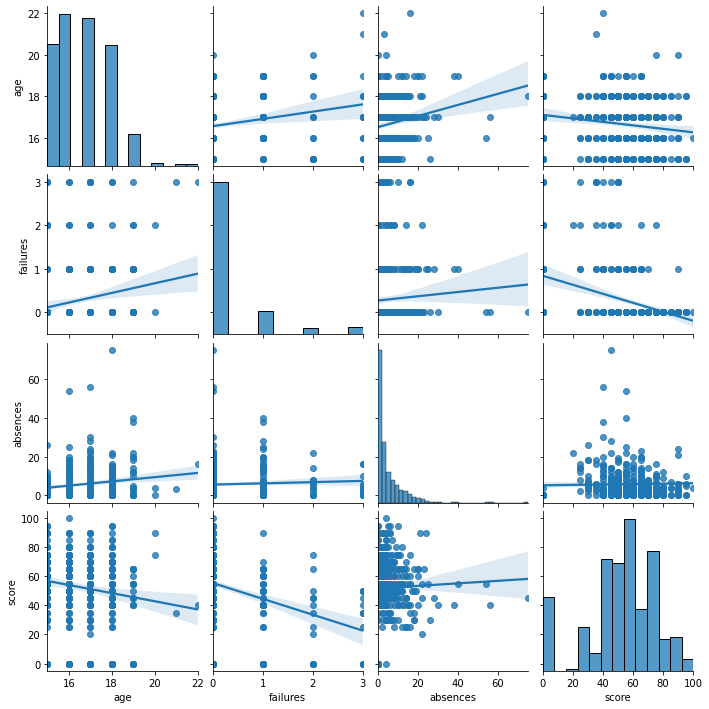

In [48]:
sns.pairplot(students_numerical, kind = 'reg')

Матрица корреляций

In [49]:
display(students_numerical.corr())

,age,failures,absences,score
age,1.000000,0.196678,0.171181,-0.153539
failures,0.196678,1.000000,0.055778,-0.336216
absences,0.171181,0.055778,1.000000,0.030592
score,-0.153539,-0.336216,0.030592,1.000000


Как видим скоррелированных данных нет и все данные имеют влияние на итоговую оценку, поэтому числовые данные оставляем в итоговом датафрейме

Матрица корреляций для псевдочисловых колонок

In [50]:
display(students_categorical.corr())

,score,freetime,studytime_granular,health,goout,famrel,studytime,traveltime,Fedu,Medu
score,1.000000,0.019380,-0.112500,-0.078073,-0.121971,0.058019,0.112500,-0.058396,0.121635,0.203778
freetime,0.019380,1.000000,0.123634,0.070894,0.287888,0.156185,-0.123634,-0.008758,-0.017376,0.039531
studytime_granular,-0.112500,0.123634,1.000000,0.061894,0.054532,-0.024272,-1.000000,0.108564,-0.006090,-0.076197
health,-0.078073,0.070894,0.061894,1.000000,-0.014571,0.100456,-0.061894,-0.036147,-0.014859,-0.068544
goout,-0.121971,0.287888,0.054532,-0.014571,1.000000,0.052336,-0.054532,0.050072,0.052745,0.065383
famrel,0.058019,0.156185,-0.024272,0.100456,0.052336,1.000000,0.024272,-0.044756,-0.020340,-0.009148
studytime,0.112500,-0.123634,-1.000000,-0.061894,-0.054532,0.024272,1.000000,-0.108564,0.006090,0.076197
traveltime,-0.058396,-0.008758,0.108564,-0.036147,0.050072,-0.044756,-0.108564,1.000000,-0.118009,-0.156792
Fedu,0.121635,-0.017376,-0.006090,-0.014859,0.052745,-0.020340,0.006090,-0.118009,1.000000,0.588624
Medu,0.203778,0.039531,-0.076197,-0.068544,0.065383,-0.009148,0.076197,-0.156792,0.588624,1.000000


Как видим ___studytime___ и ___studytime_granular___ абсолютно скоррелированы, поэтому столбец ___studytime_granular___ удалим

In [51]:
students_categorical.drop(['studytime_granular'], axis=1, inplace = True)
display(students_categorical.corr())

C:\Users\Cfif\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,score,freetime,health,goout,famrel,studytime,traveltime,Fedu,Medu
score,1.000000,0.019380,-0.078073,-0.121971,0.058019,0.112500,-0.058396,0.121635,0.203778
freetime,0.019380,1.000000,0.070894,0.287888,0.156185,-0.123634,-0.008758,-0.017376,0.039531
health,-0.078073,0.070894,1.000000,-0.014571,0.100456,-0.061894,-0.036147,-0.014859,-0.068544
goout,-0.121971,0.287888,-0.014571,1.000000,0.052336,-0.054532,0.050072,0.052745,0.065383
famrel,0.058019,0.156185,0.100456,0.052336,1.000000,0.024272,-0.044756,-0.020340,-0.009148
studytime,0.112500,-0.123634,-0.061894,-0.054532,0.024272,1.000000,-0.108564,0.006090,0.076197
traveltime,-0.058396,-0.008758,-0.036147,0.050072,-0.044756,-0.108564,1.000000,-0.118009,-0.156792
Fedu,0.121635,-0.017376,-0.014859,0.052745,-0.020340,0.006090,-0.118009,1.000000,0.588624
Medu,0.203778,0.039531,-0.068544,0.065383,-0.009148,0.076197,-0.156792,0.588624,1.000000


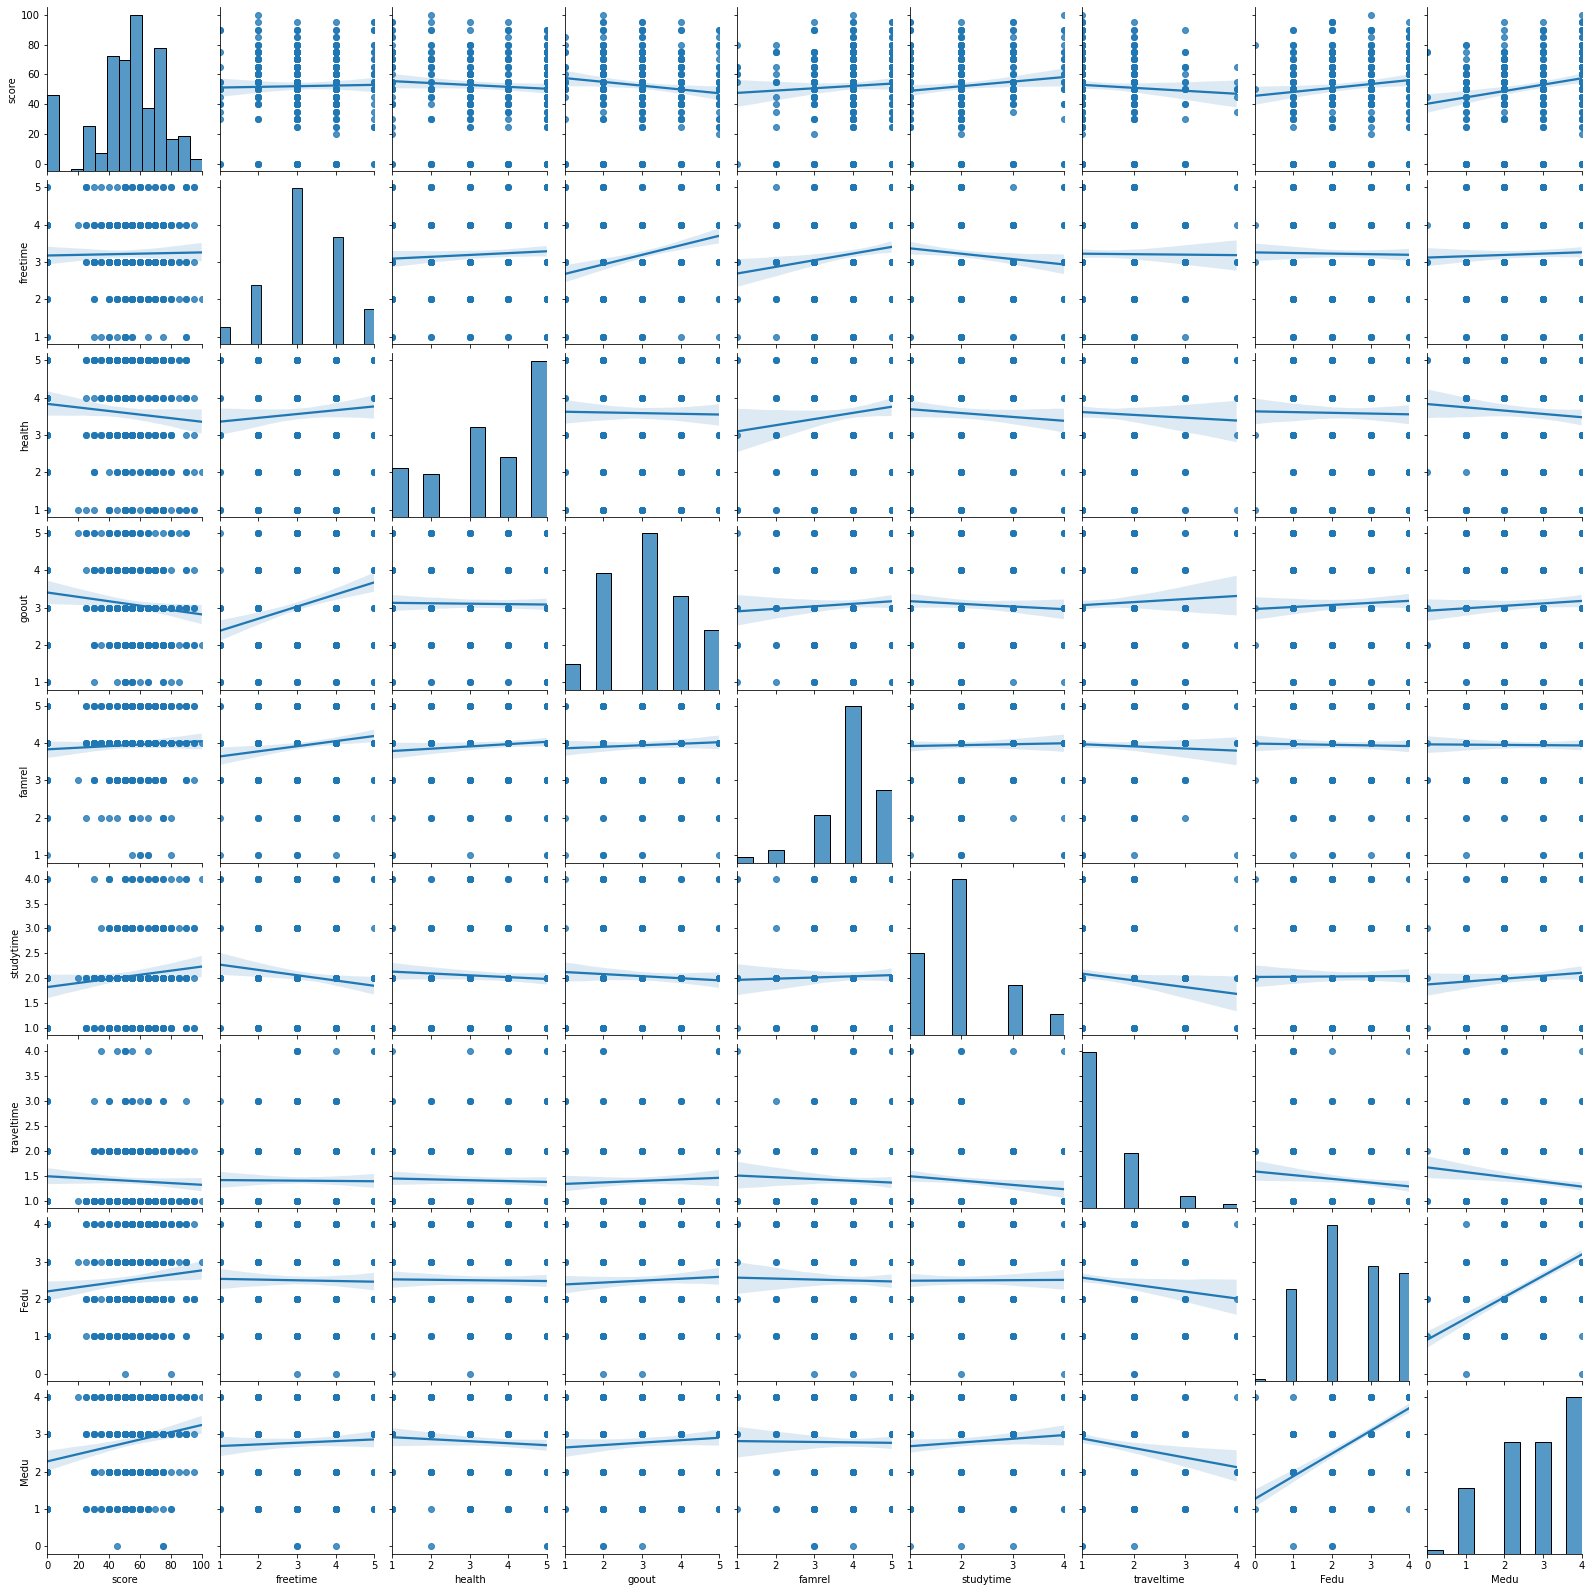

In [52]:
sns.pairplot(students_categorical, kind = 'reg')

Выполним анализ пары ___Fedu, Medu___

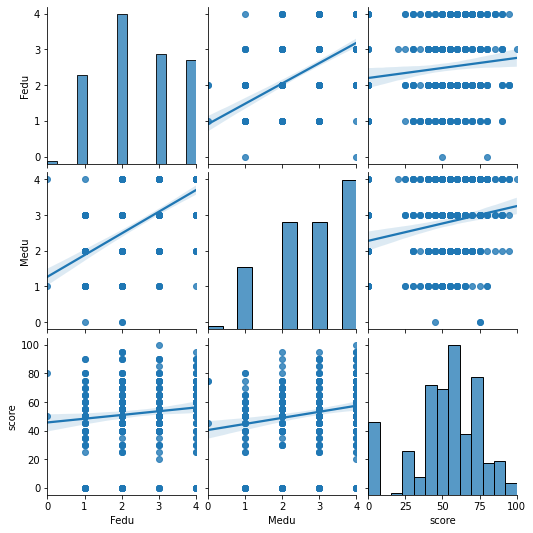

In [53]:
sns.pairplot(students_categorical, vars=['Fedu', 'Medu','score'], kind='reg')

Создатим в students_categorical новую колонку FMedu = max(Fedu, Medu)

In [54]:
students_categorical['FMedu'] = students_categorical.apply(lambda x: max(x.loc['Fedu'], x.loc['Medu']), axis=1)
#display (students_categorical)

<ipython-input-54-27564a7c8858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_categorical['FMedu'] = students_categorical.apply(lambda x: max(x.loc['Fedu'], x.loc['Medu']), axis=1)


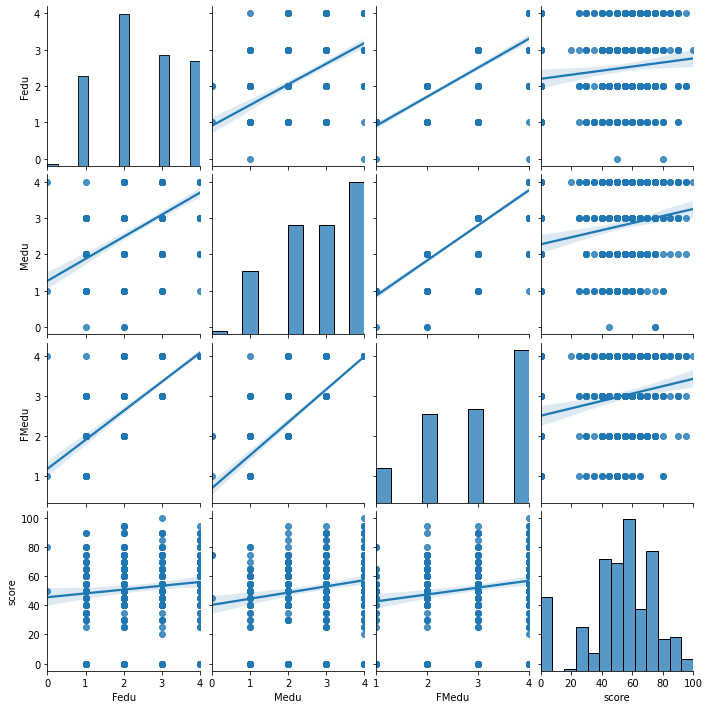

In [55]:
sns.pairplot(students_categorical, vars=['Fedu', 'Medu', 'FMedu', 'score'], kind='reg')

In [56]:
display(students_categorical.Fedu.describe())
display(students_categorical.Medu.describe())
display(students_categorical.FMedu.describe())

count    385.000000
mean       2.493506
std        1.063399
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

count    385.000000
mean       2.784416
std        1.098183
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

count    385.000000
mean       2.987013
std        1.014138
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: FMedu, dtype: float64

Предпологается, что можно объединить Fedu и Medu используя максимальное из них. НО ЭТО НЕ ТОЧНО!!! Видно завышение статистических данных. Пока не решил

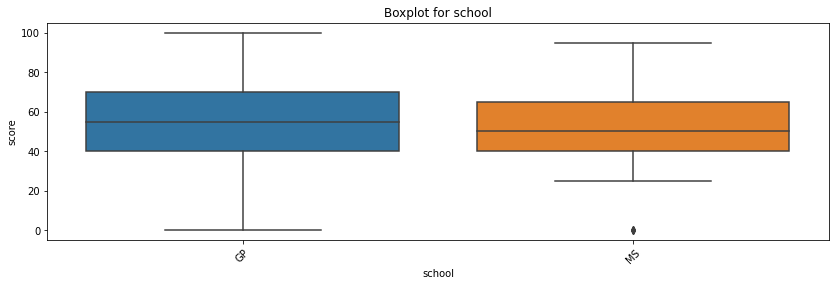

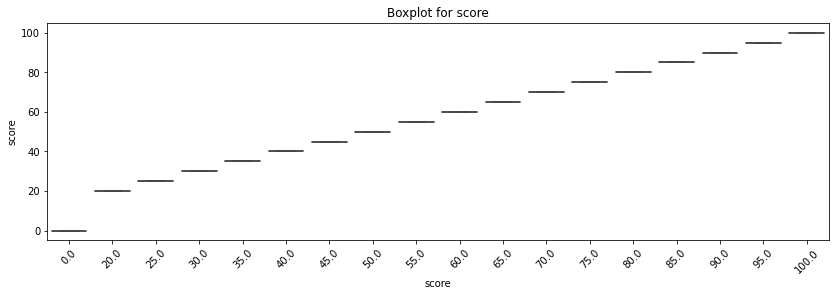

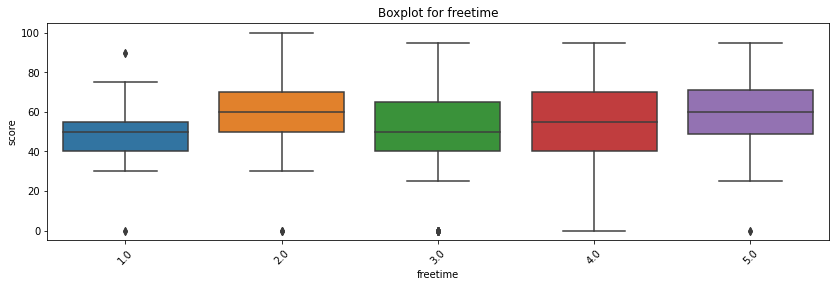

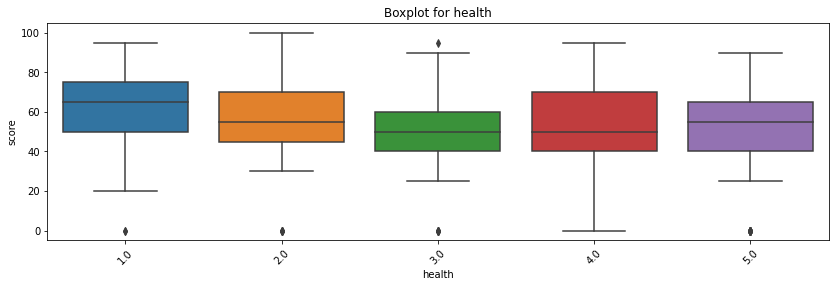

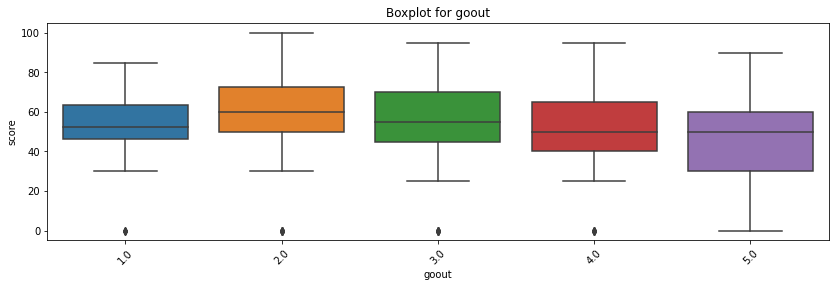

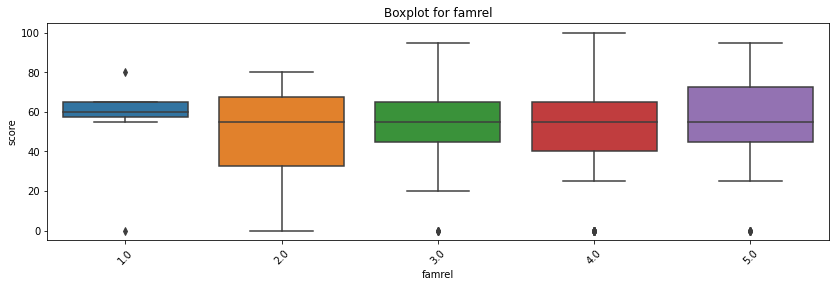

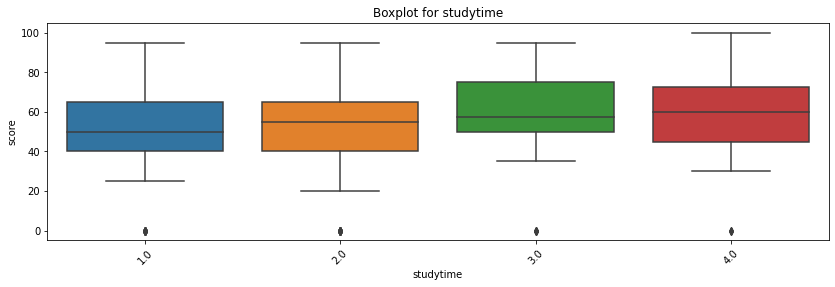

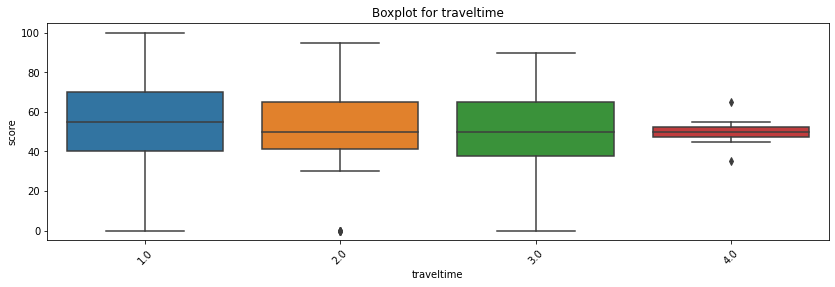

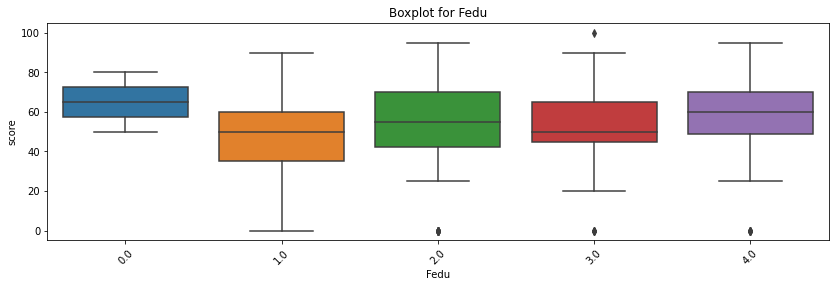

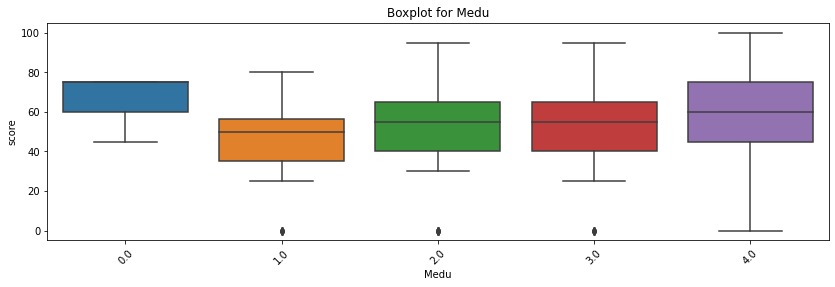

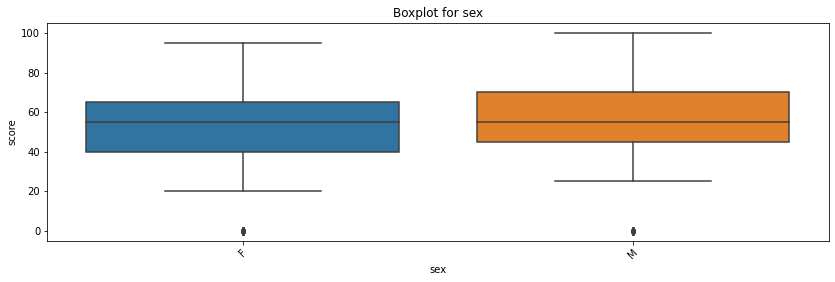

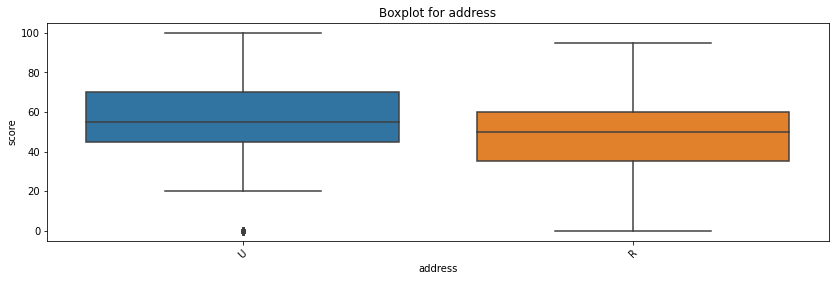

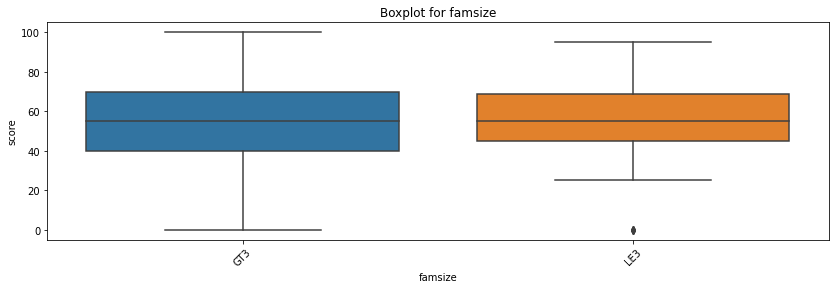

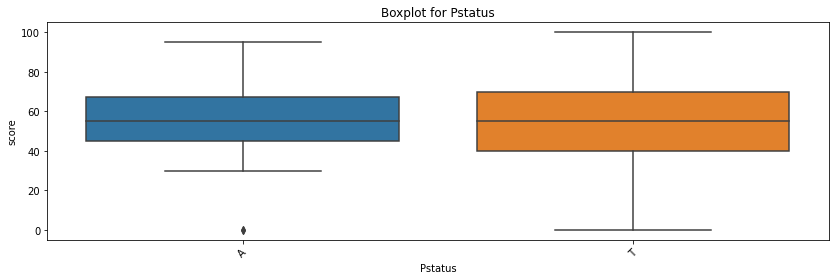

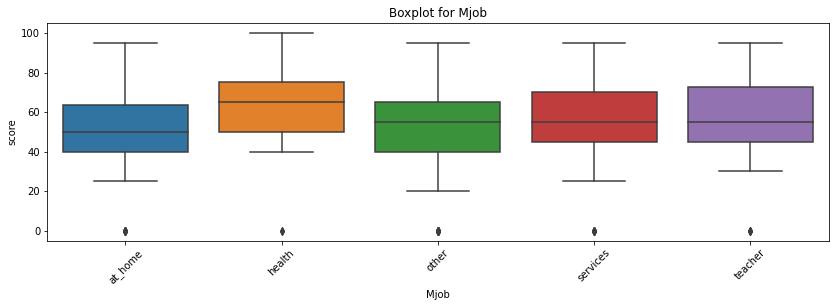

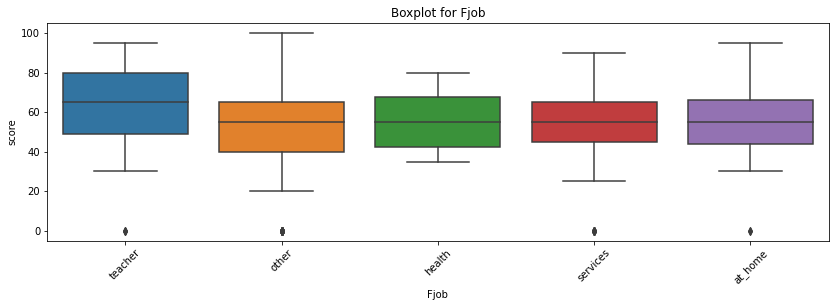

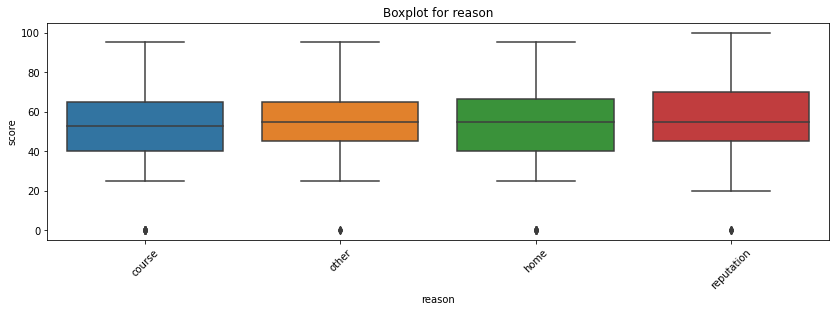

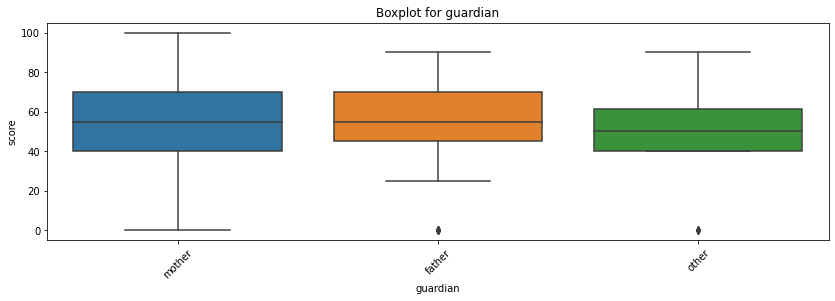

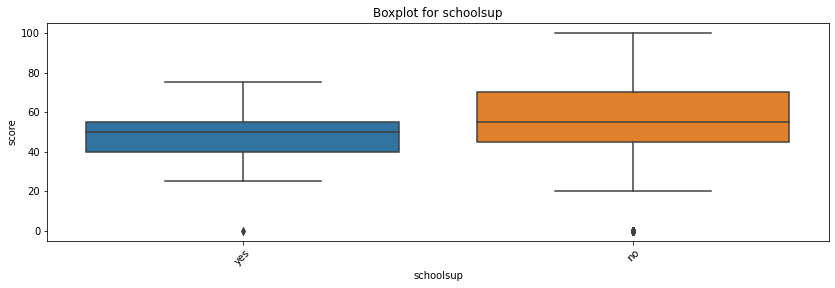

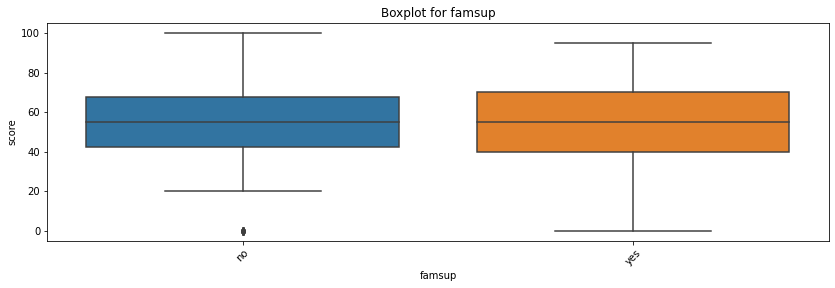

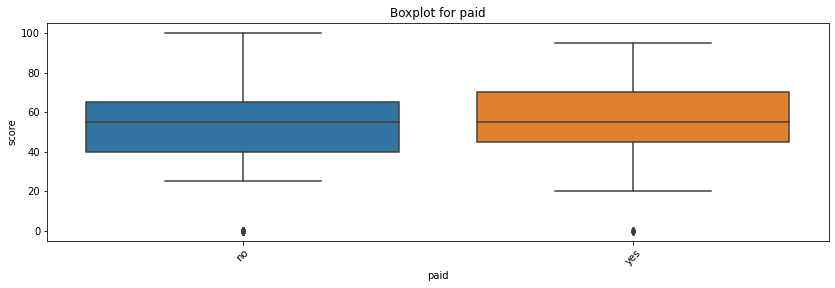

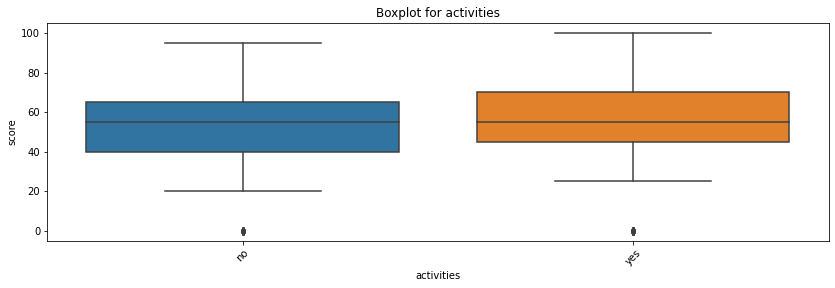

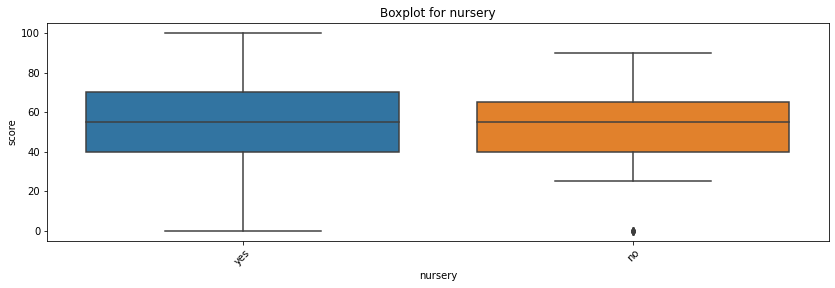

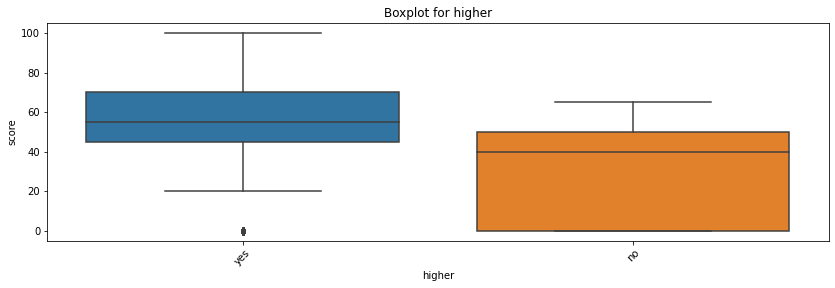

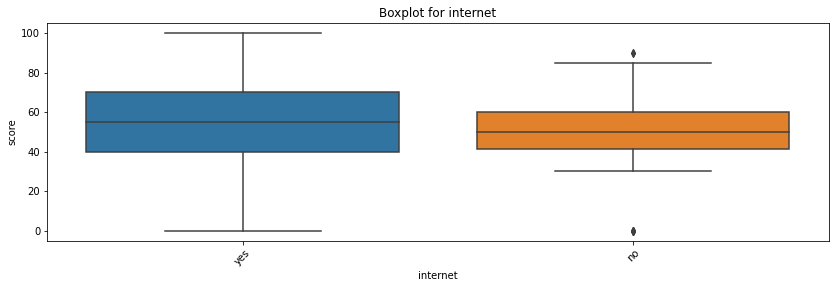

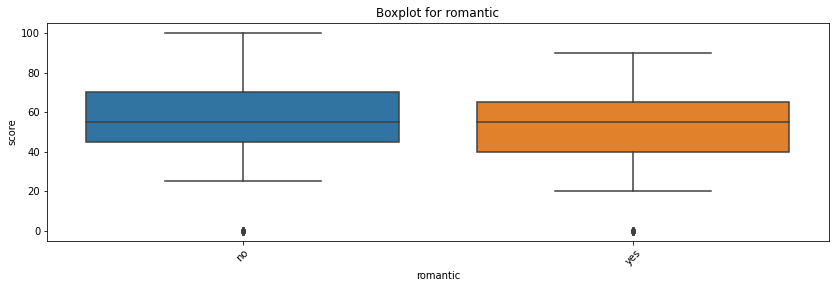

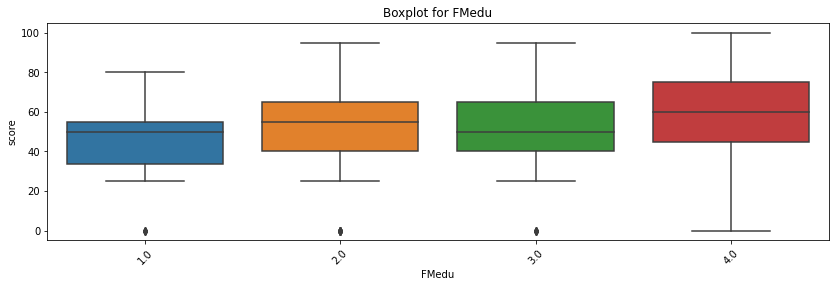

In [57]:
get_boxplot(students_categorical)

По графикам похоже, что почти все параметры могут влиять на оценку. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [58]:
for col in students_categorical.columns:
    if col == 'score':
        continue
    else:
        get_stat_dif(students_categorical, col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки FMedu


Как мы видим, серьёзно отличаются следующие параметры: Medu, sex, address, Mjob, paid, higher, romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, с учетом числовых признаков,которые, возможно, оказывают влияние на оценку, это: Medu, sex, address, Mjob, paid, higher, romantic, age, failures,	absences.

In [59]:
for colum in students.columns:
    if colum in ('Medu', 'sex', 'address', 'Mjob', 'paid','higher',
                 'romantic', 'age', 'failures', 'absences', 'score'):
        continue
    else:
        students.drop([colum], axis=1, inplace = True) # Удаление
display(students)
display(students.info()) 

,sex,age,address,Medu,Mjob,failures,paid,higher,romantic,absences,score
0,F,18,U,4.0,at_home,0.0,no,yes,no,6.0,30.0
1,F,17,U,1.0,at_home,0.0,no,yes,no,4.0,30.0
2,F,15,U,1.0,at_home,3.0,no,yes,no,10.0,50.0
3,F,15,U,4.0,health,0.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,other,0.0,yes,yes,no,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
389,F,18,U,1.0,other,1.0,no,yes,no,0.0,0.0
391,M,17,U,3.0,services,0.0,no,yes,no,3.0,80.0
392,M,21,R,1.0,other,3.0,no,yes,no,3.0,35.0
393,M,18,R,3.0,services,0.0,no,yes,no,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       385 non-null    object 
 1   age       385 non-null    int64  
 2   address   385 non-null    object 
 3   Medu      385 non-null    float64
 4   Mjob      385 non-null    object 
 5   failures  385 non-null    float64
 6   paid      385 non-null    object 
 7   higher    385 non-null    object 
 8   romantic  385 non-null    object 
 9   absences  385 non-null    float64
 10  score     385 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 46.1+ KB


None

# Выводы.

Итак, в результате анализа влияния различных параметров на итоговую оценку по матиматике были получены следующие выводы:

В данных немного мало пустых значений, которые были восполнены для числовых признаков медианным значением, а для категориальных - модой. Количество найденных выбросов незначительно, что позволяет сделать вывод о том, что данные достаточно чистые. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: ___Medu, sex, address, Mjob, paid, higher, romantic, age, failures, absences___.